# Canny edges

Canny edge detection is a popular algorithm for finding edges in an image. There are a couple of steps involved in performing this method:

- Edge detection is sensitive to noise, so the first step is to apply a noise filter. A 5x5 Guassian filter will hopefully do the trick.
- Determine threshold (second and third arguments) for hysteresis procedure (difference between two angles)

The program below computes a reasonable estimate for what the thresholding values should be.


In [17]:
import numpy as np
import cv2

# this function computes a reasonable estimate for what the thresholding values should be.

def getAutoEdge(image, sigma=0.23):

    # takes in an array and returns the median
    v = np.median(image)
    
    # lower and upper limit
    
    l = int(max(0, (1.0 - sigma) * v))
    u = int(min(255, (1.0 + sigma) * v))

    return u
    
img = cv2.imread('violin.png',0)

getAutoEdge(img)

12

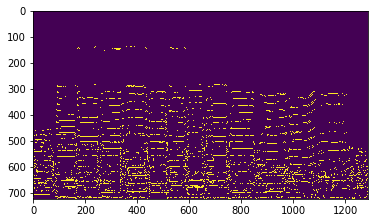

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

gray = cv2.imread('violin.png')
filter = cv2.GaussianBlur(gray, (5,5), 7, 12)
edges = cv2.Canny(filter,50,150,apertureSize = 3)
cv2.imwrite('edges-50-150.jpg',edges)
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

a,b,c = lines.shape
for i in range(a):
    cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
    cv2.imwrite('houghlines5.jpg',gray)

plt.imshow(edges)
plt.show()

This edge detection method either doesn't work well, or I'm not understanding how to use it.

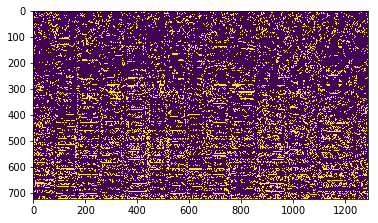

In [22]:
import numpy as np
import cv2

image = cv2.imread("violin.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply Gaussian blur to help reduce noise

image = cv2.GaussianBlur(image, (5, 5), 0)

# the second and third arguments are the respective cutoff points of gradient values being assessed.
# right now, they are arbitrary and we can change them to see if we ever get something we like.

canny = cv2.Canny(image, 1, 10)

plt.imshow(canny)
plt.show()

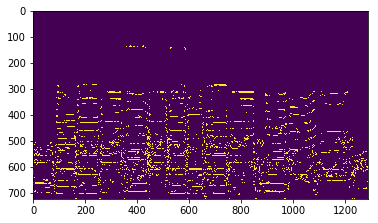

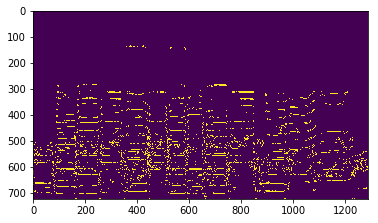

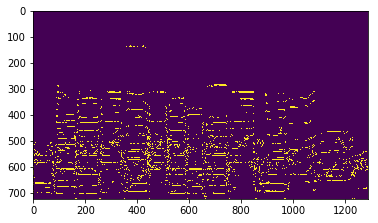

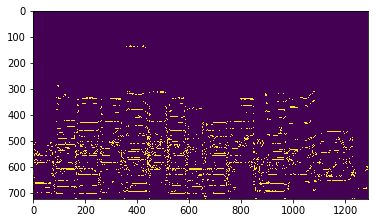

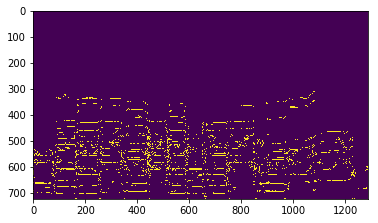

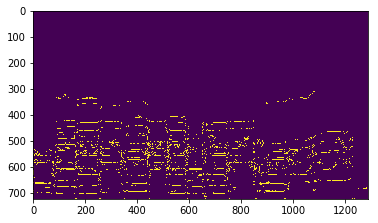

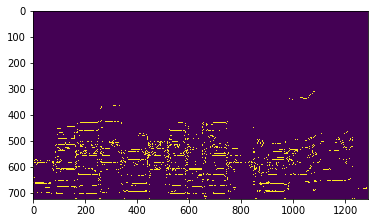

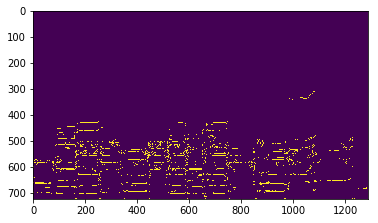

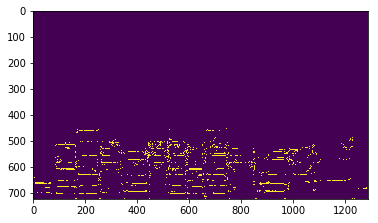

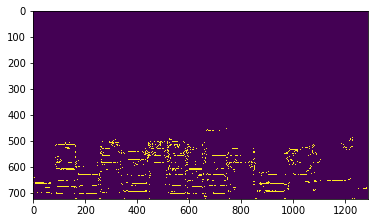

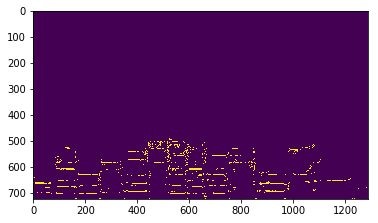

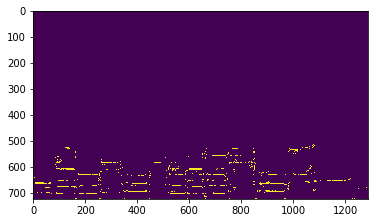

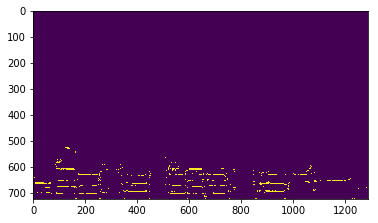

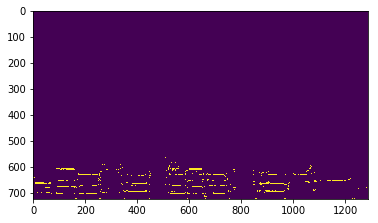

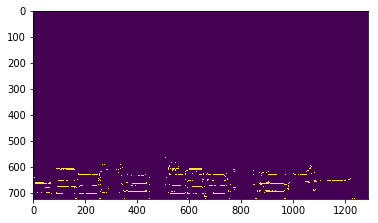

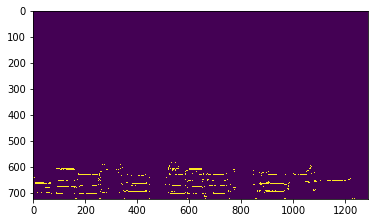

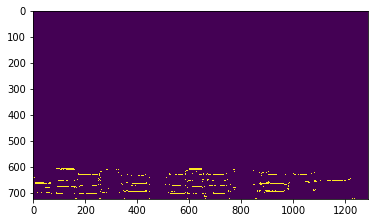

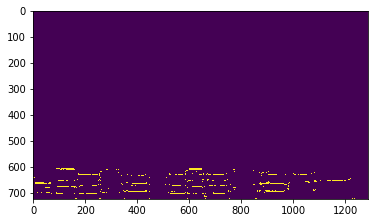

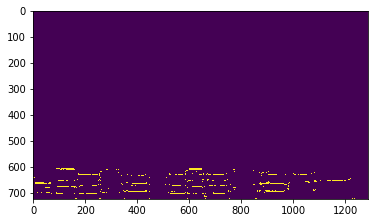

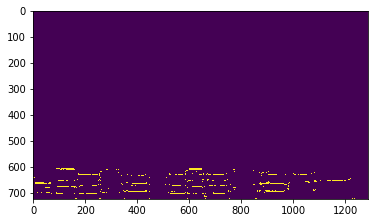

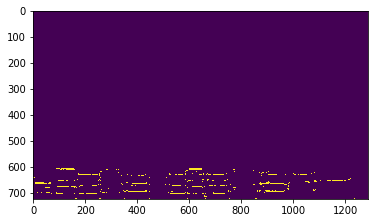

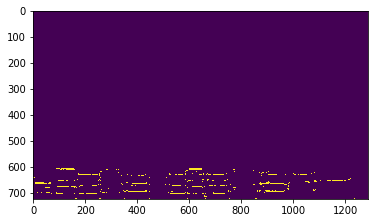

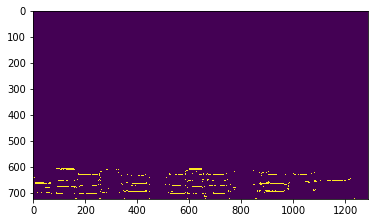

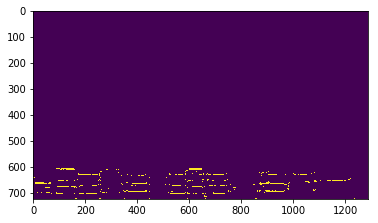

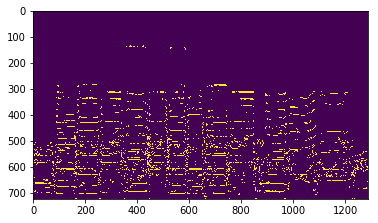

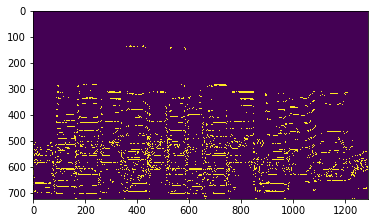

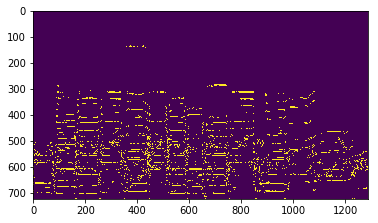

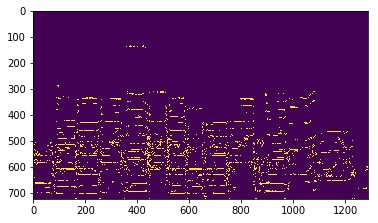

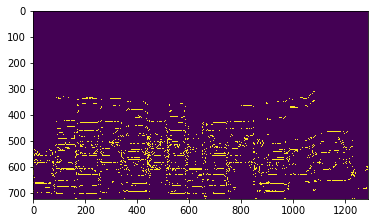

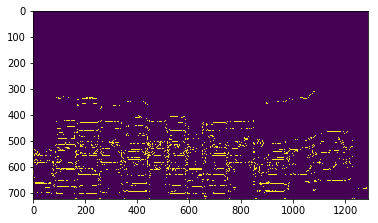

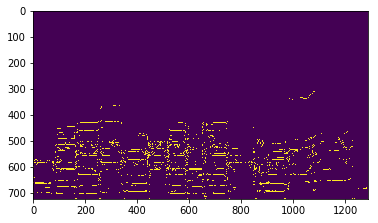

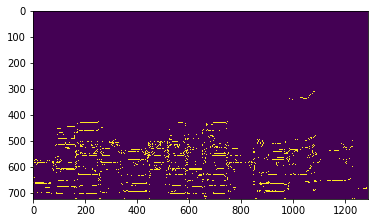

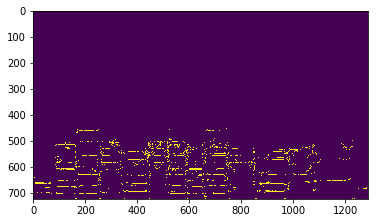

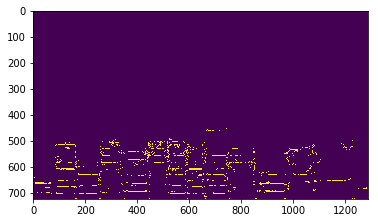

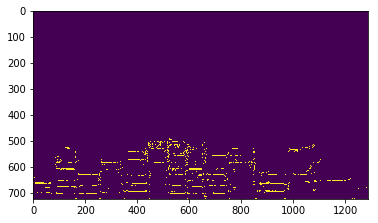

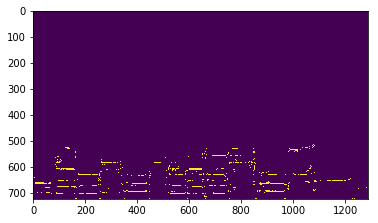

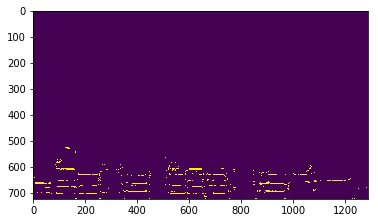

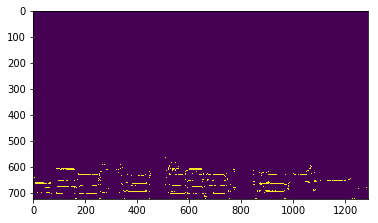

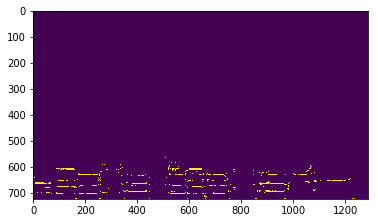

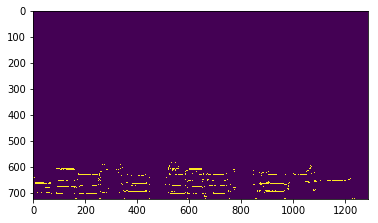

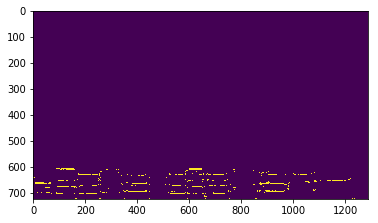

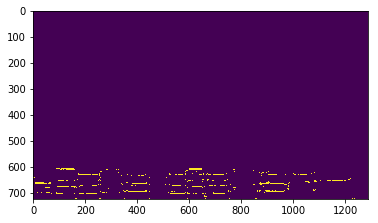

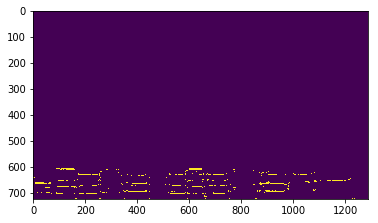

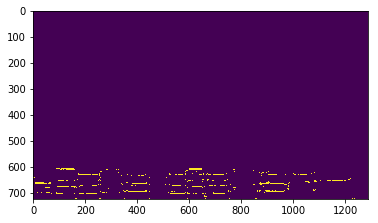

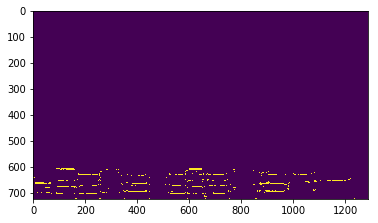

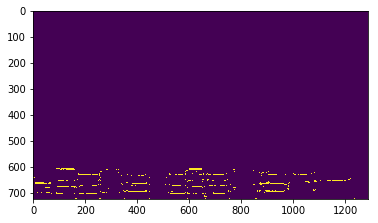

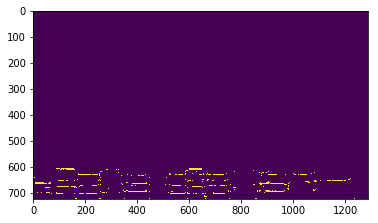

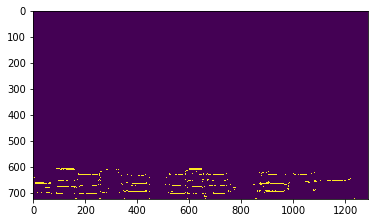

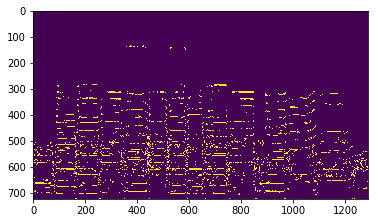

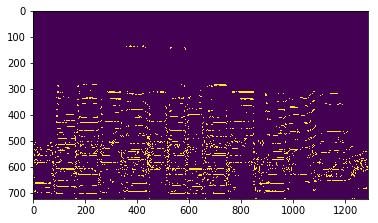

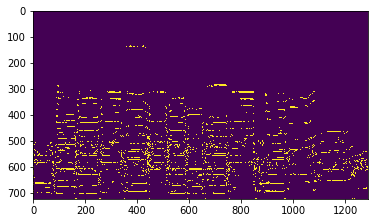

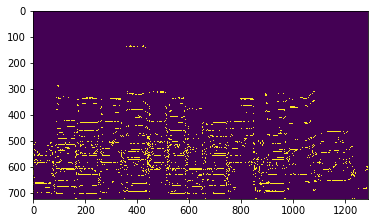

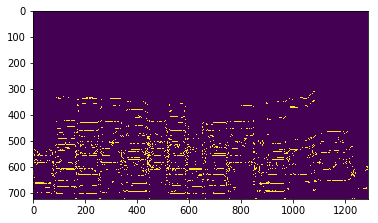

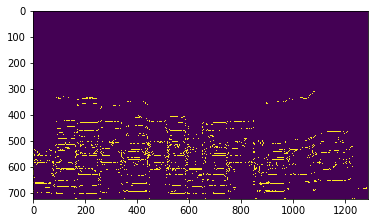

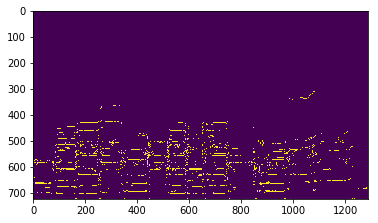

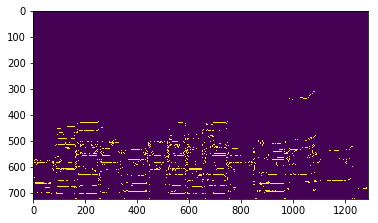

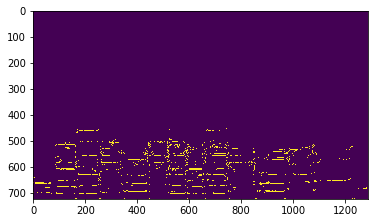

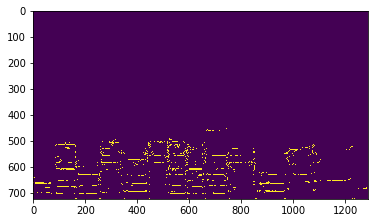

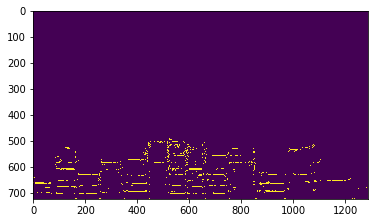

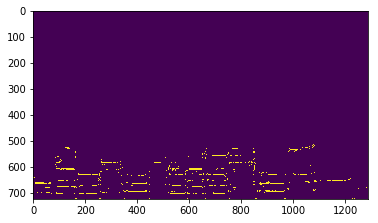

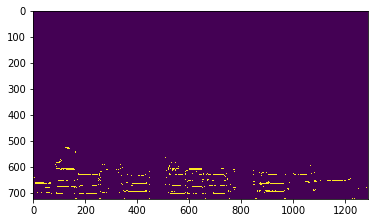

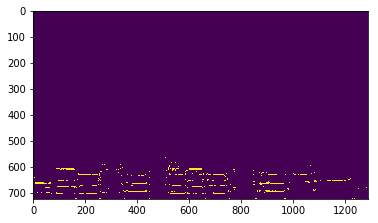

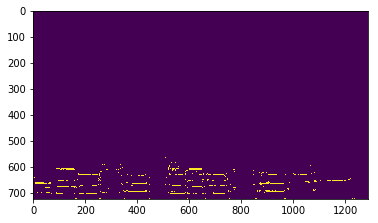

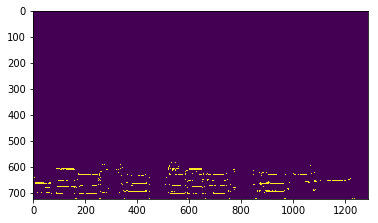

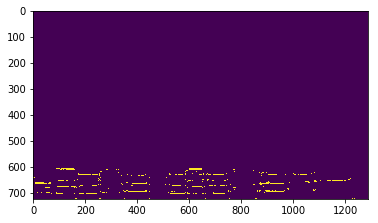

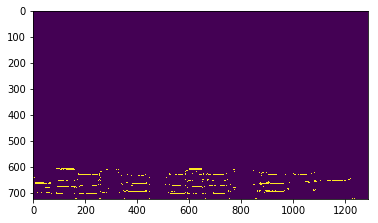

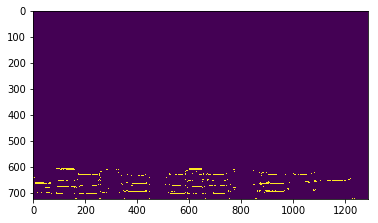

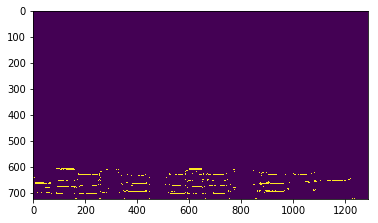

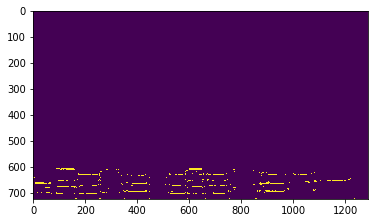

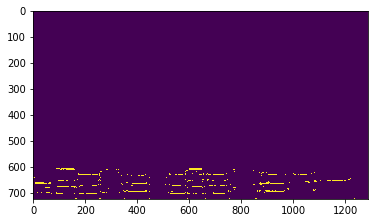

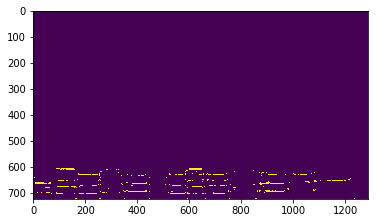

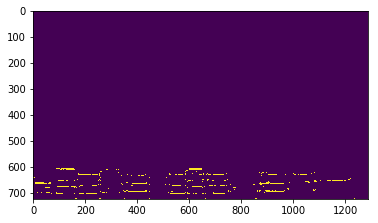

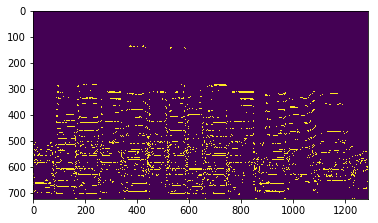

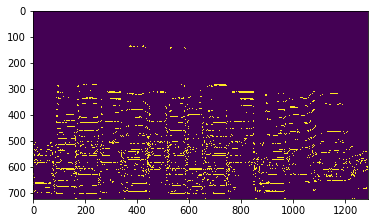

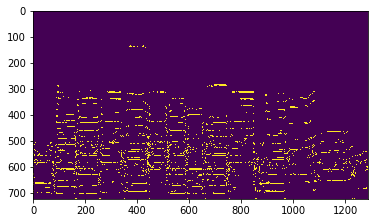

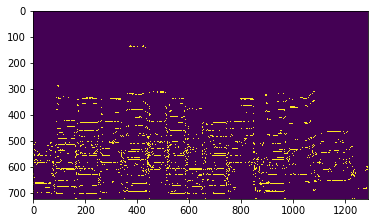

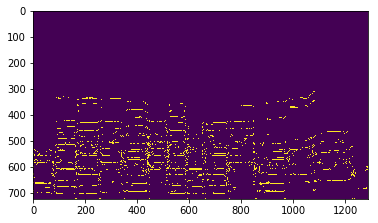

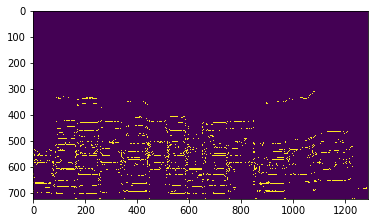

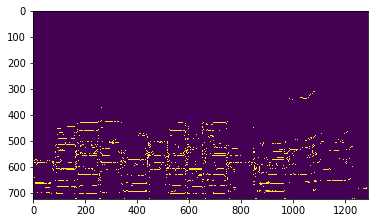

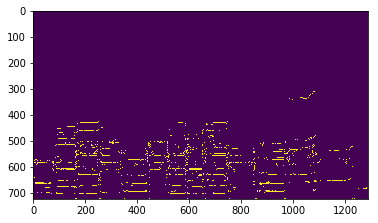

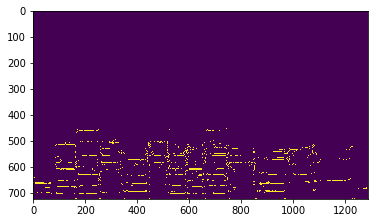

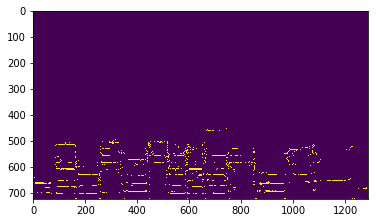

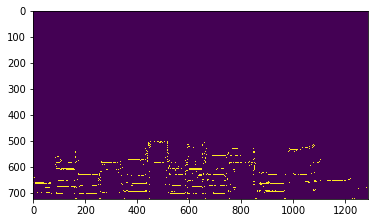

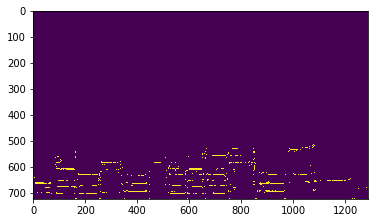

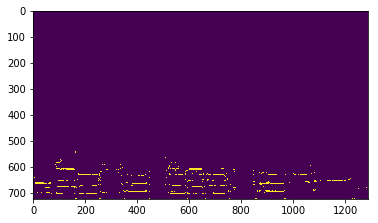

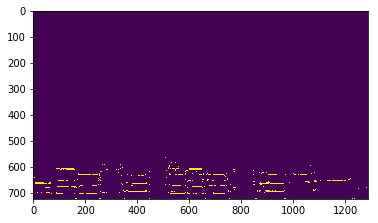

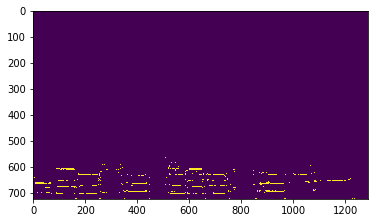

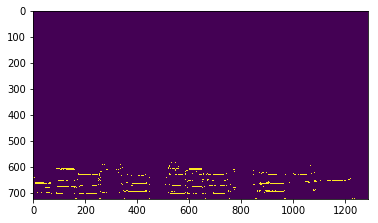

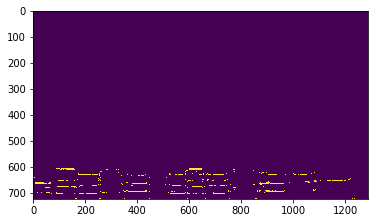

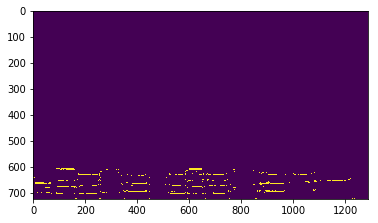

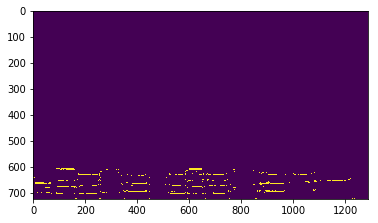

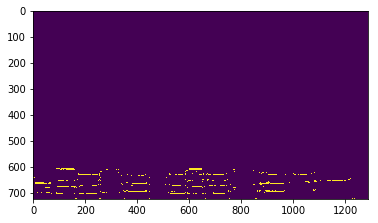

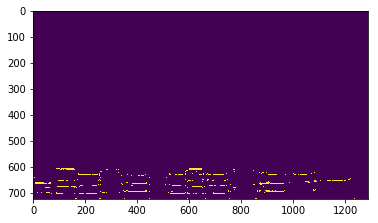

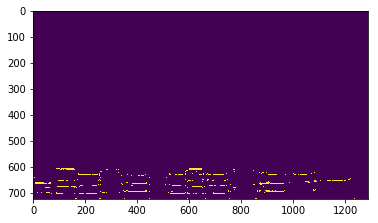

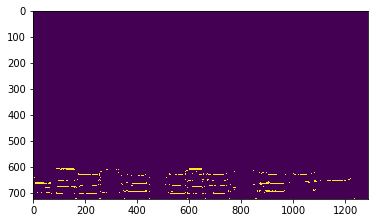

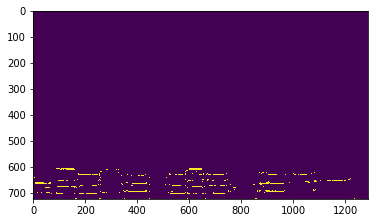

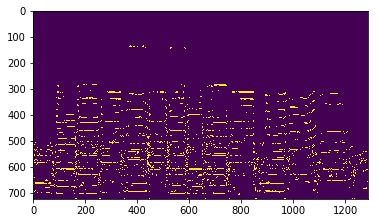

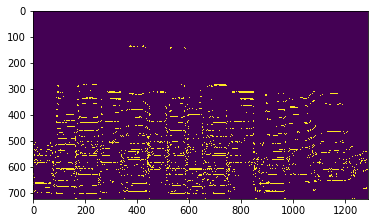

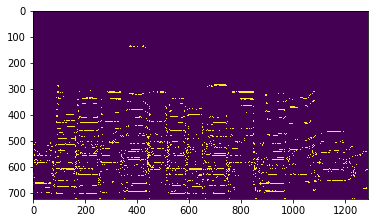

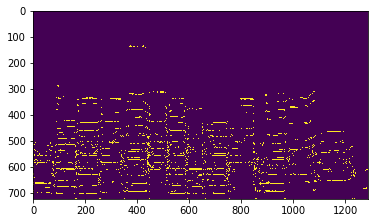

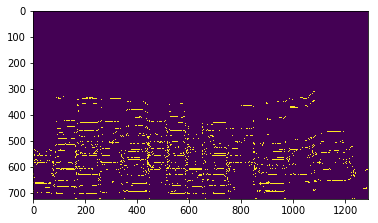

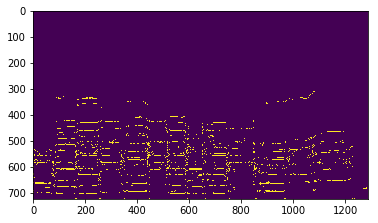

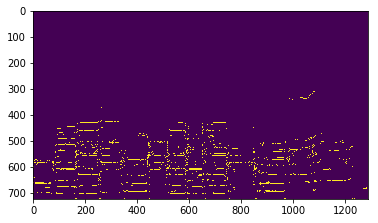

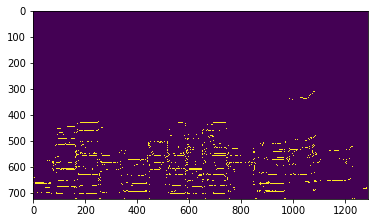

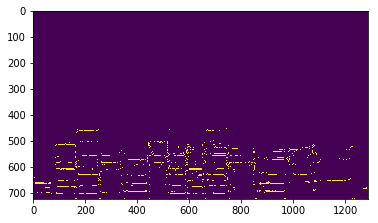

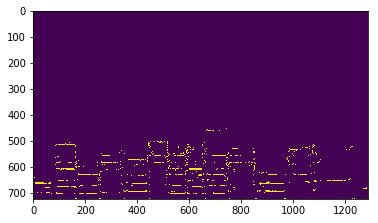

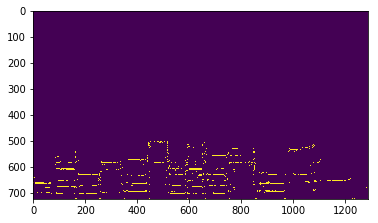

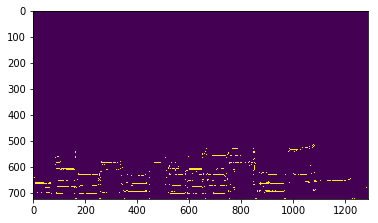

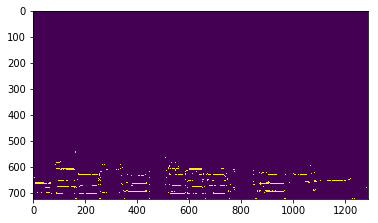

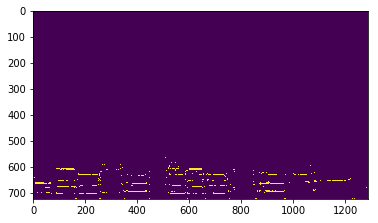

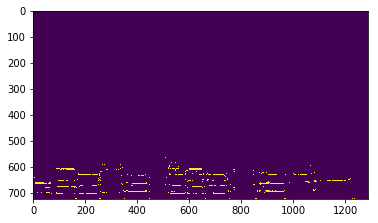

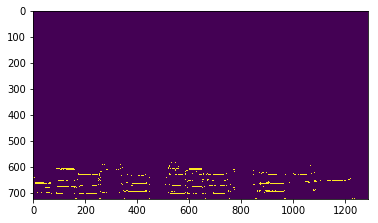

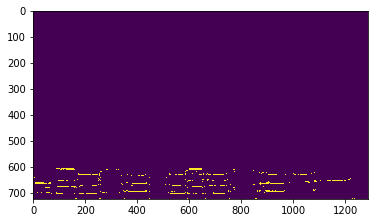

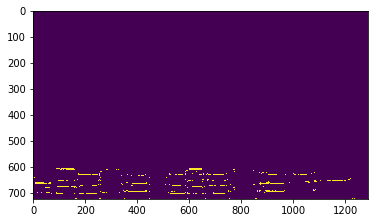

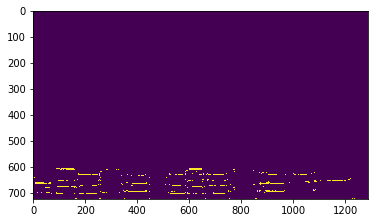

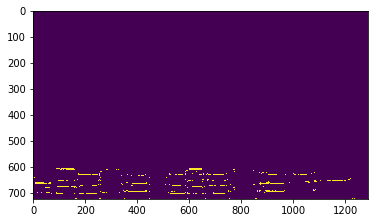

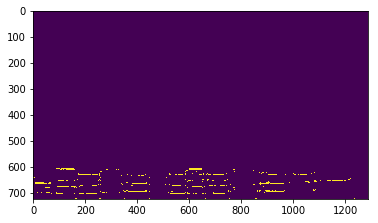

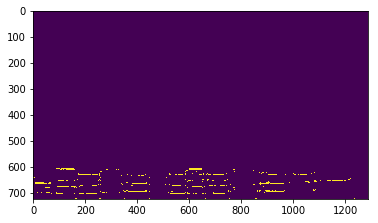

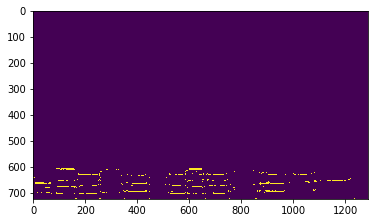

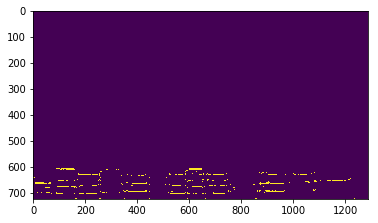

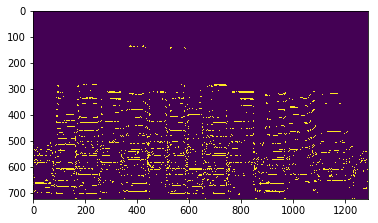

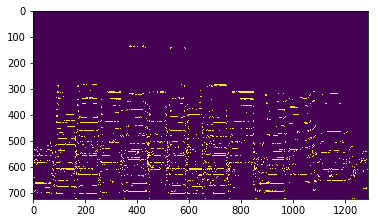

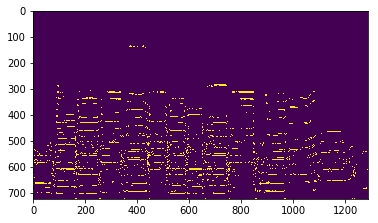

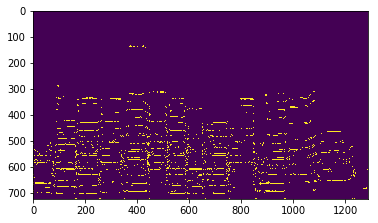

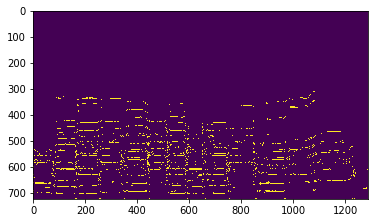

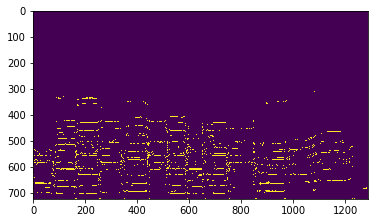

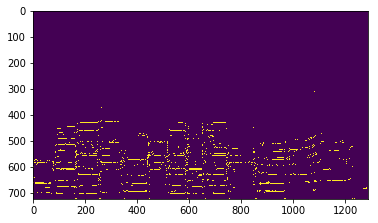

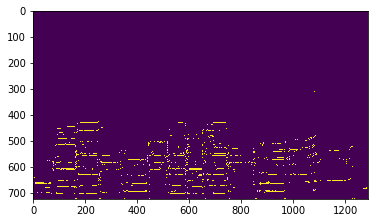

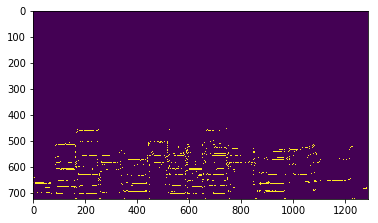

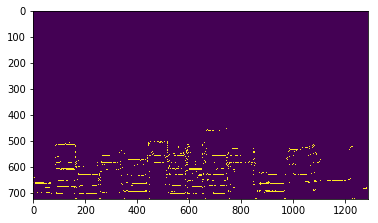

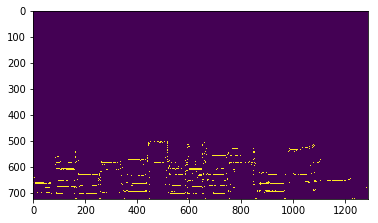

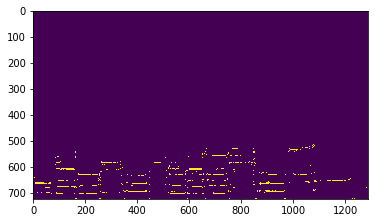

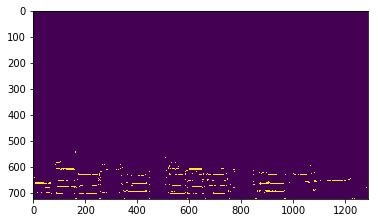

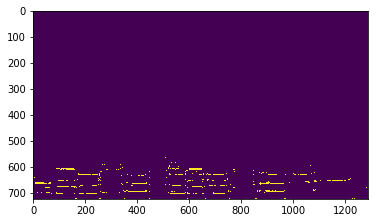

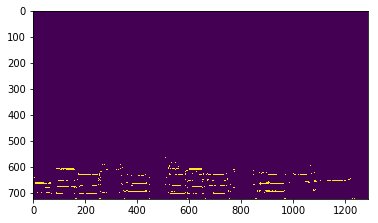

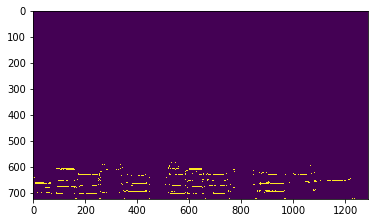

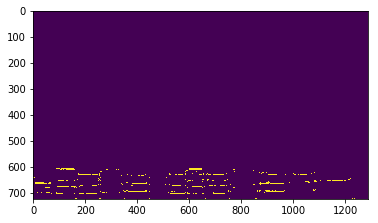

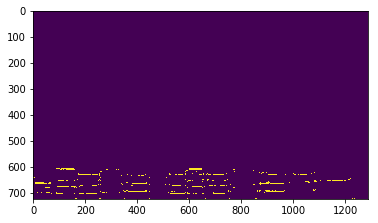

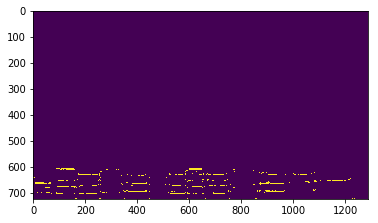

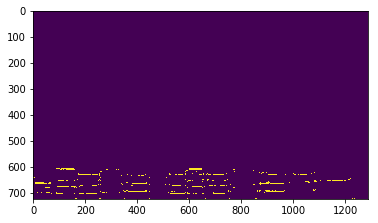

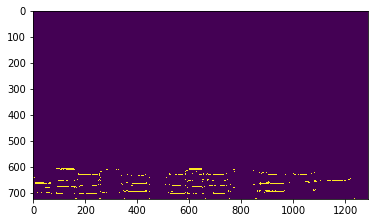

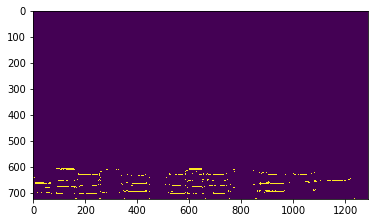

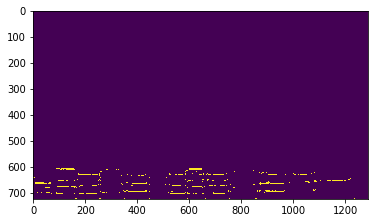

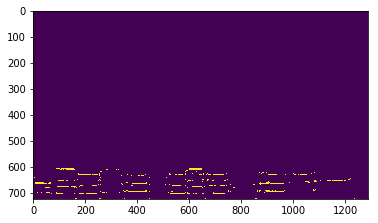

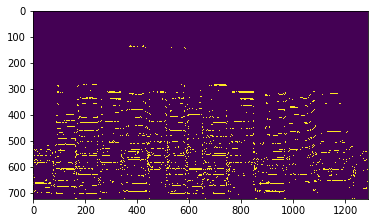

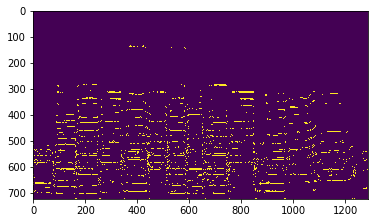

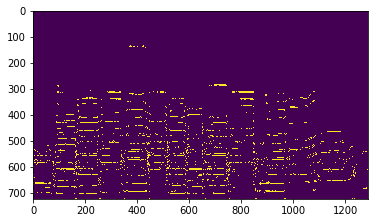

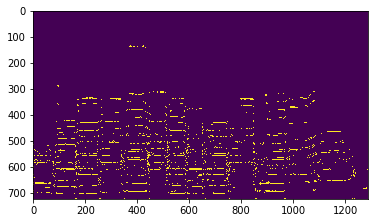

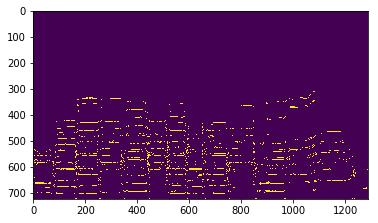

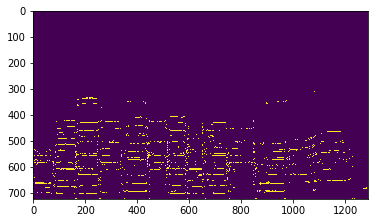

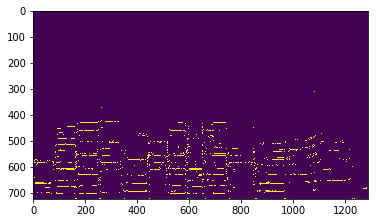

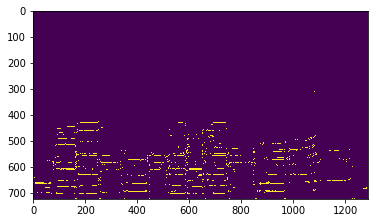

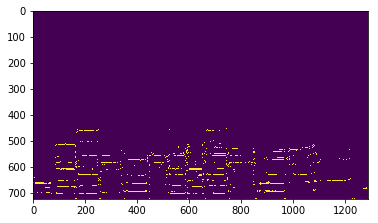

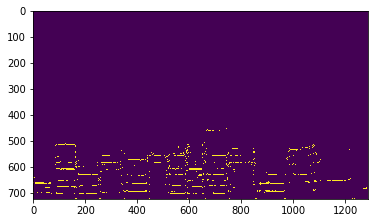

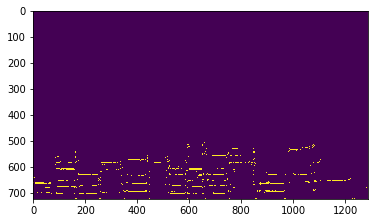

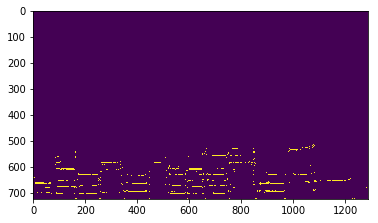

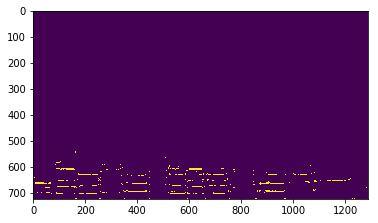

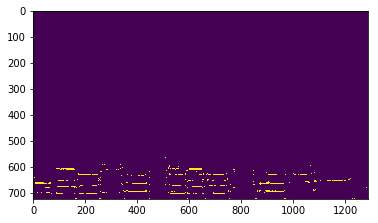

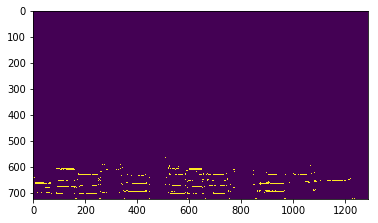

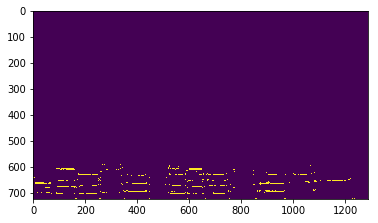

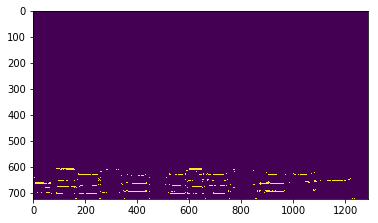

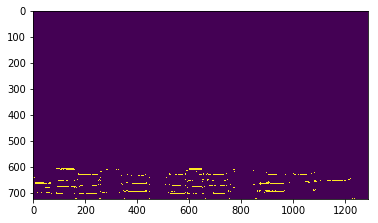

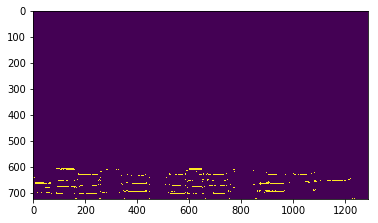

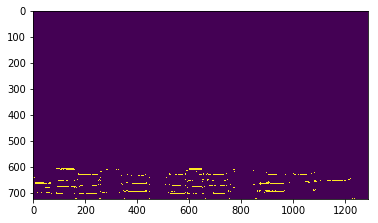

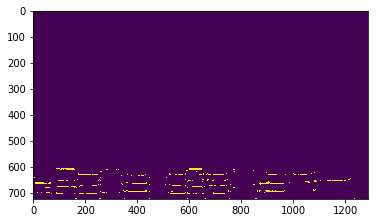

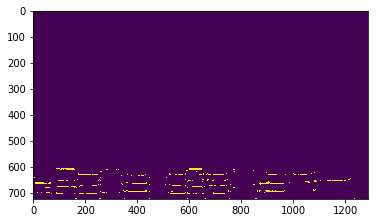

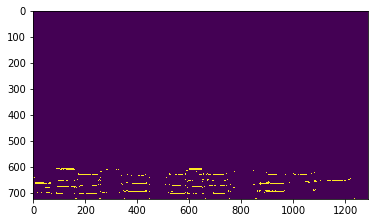

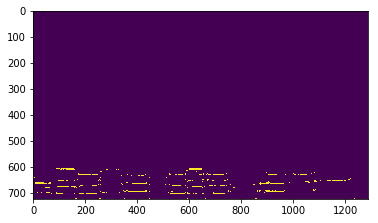

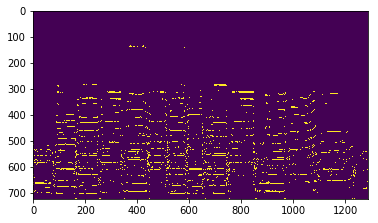

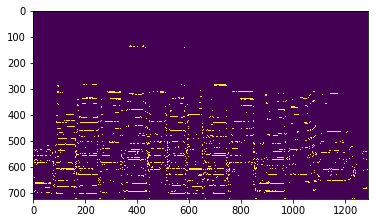

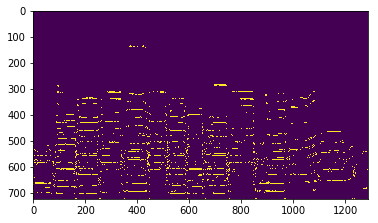

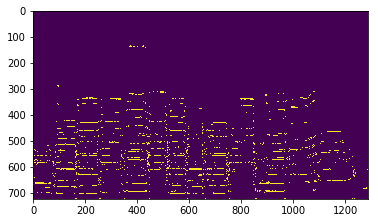

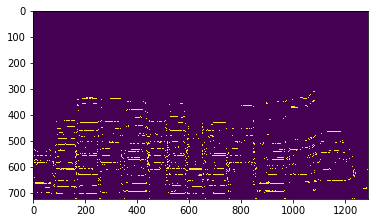

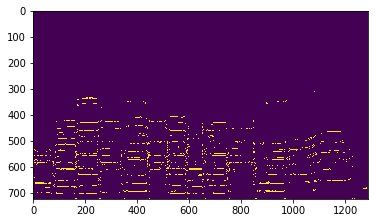

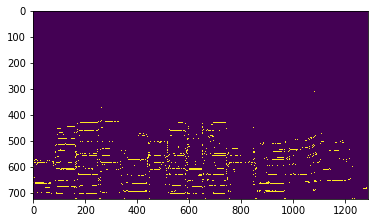

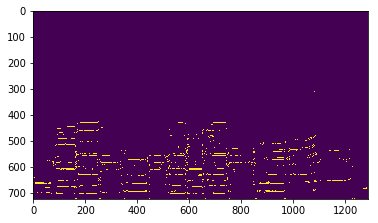

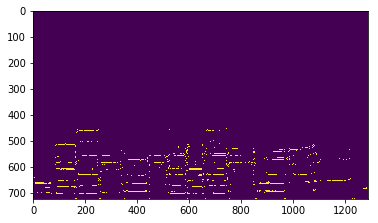

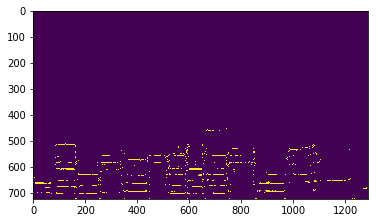

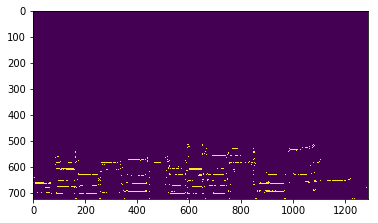

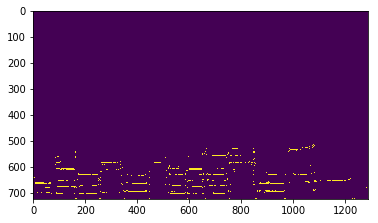

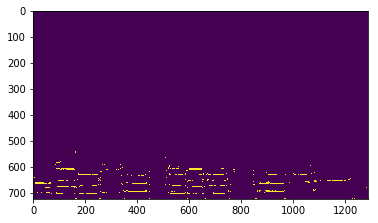

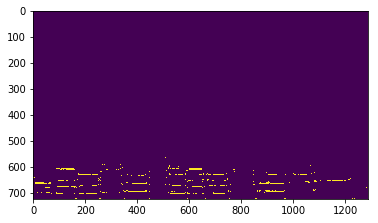

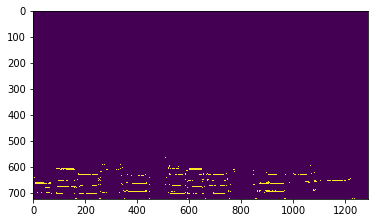

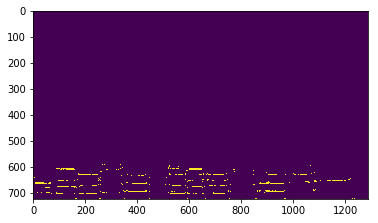

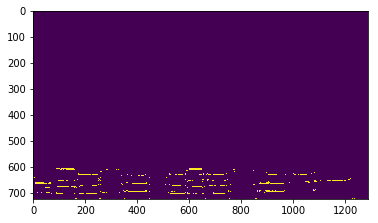

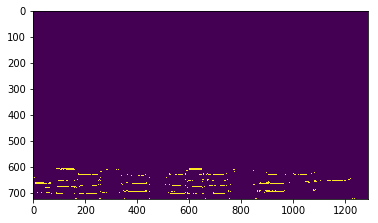

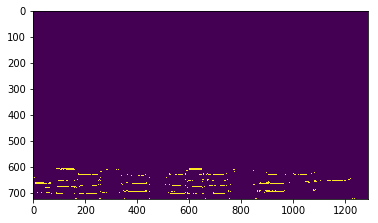

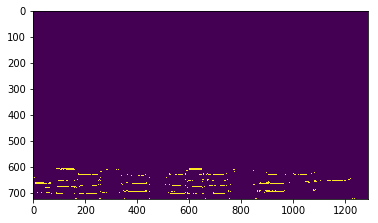

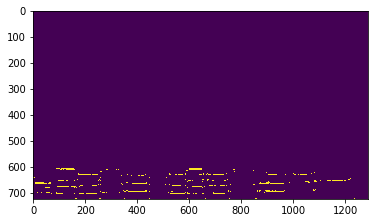

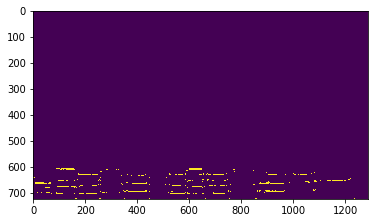

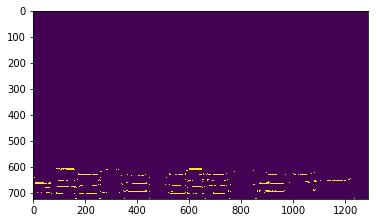

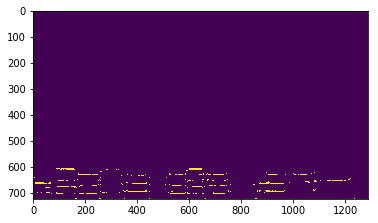

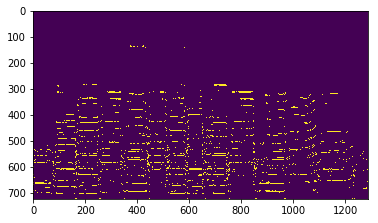

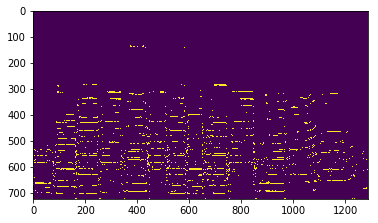

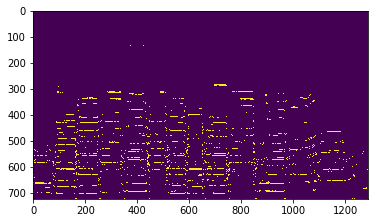

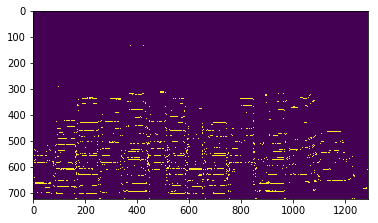

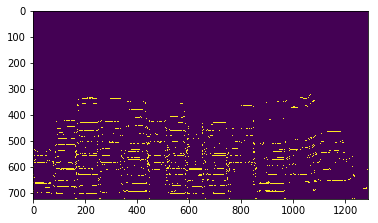

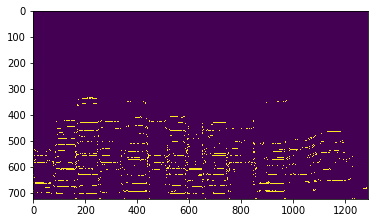

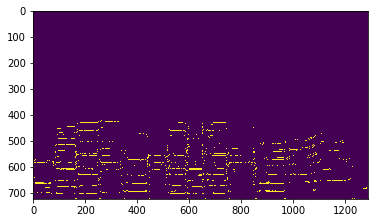

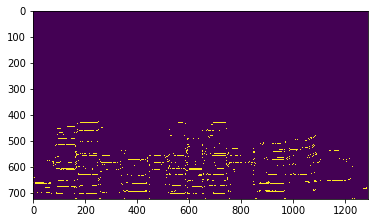

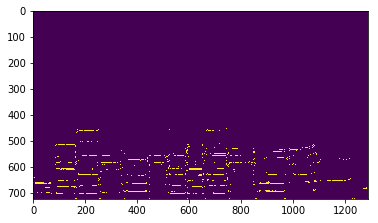

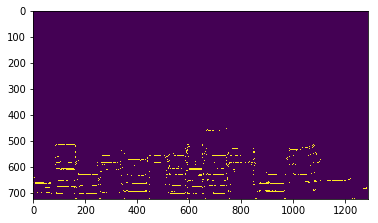

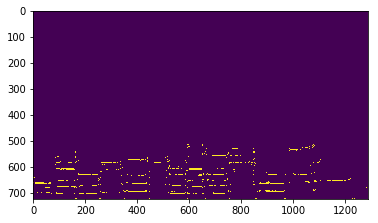

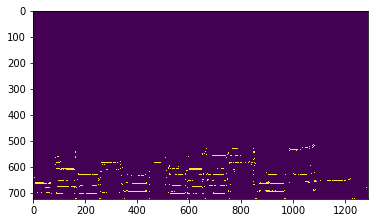

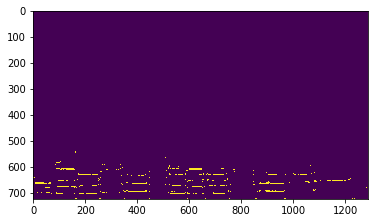

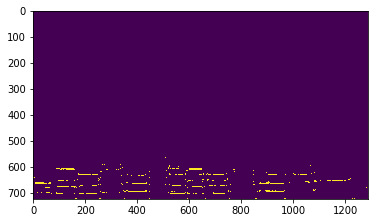

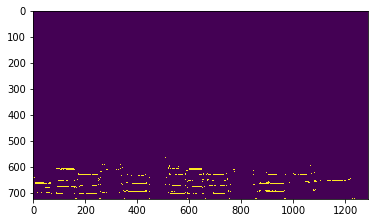

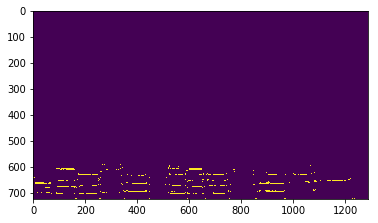

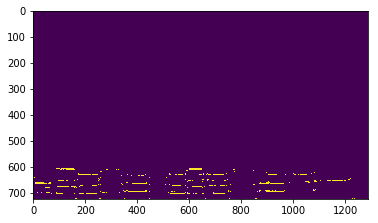

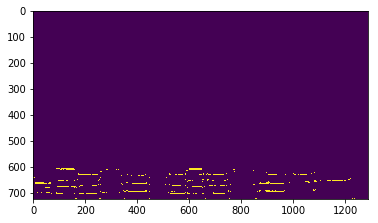

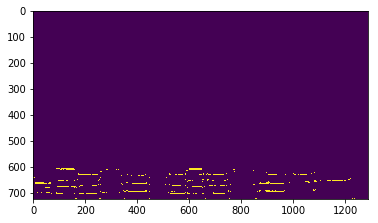

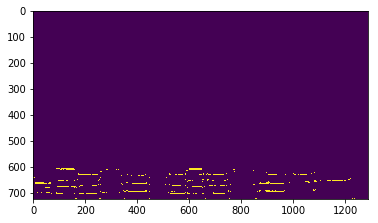

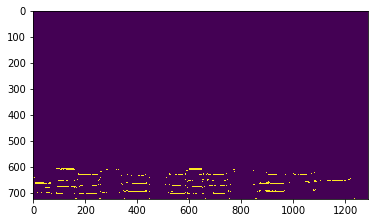

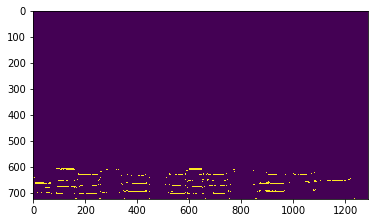

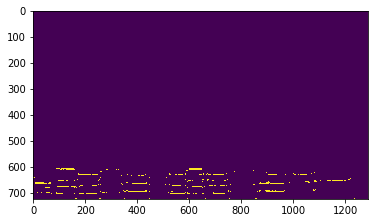

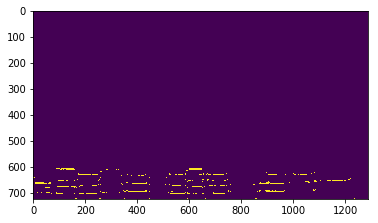

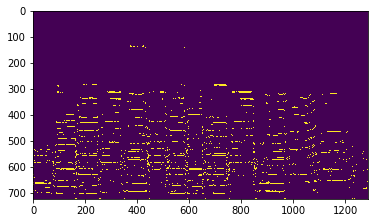

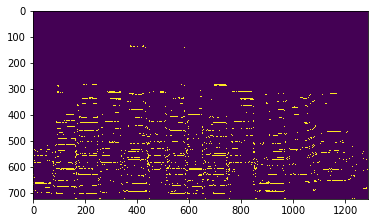

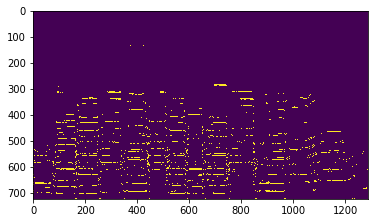

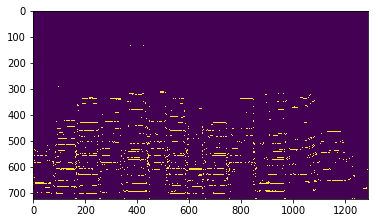

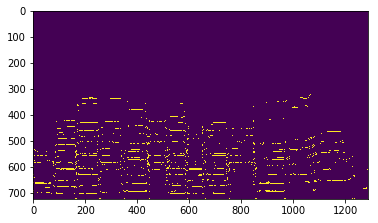

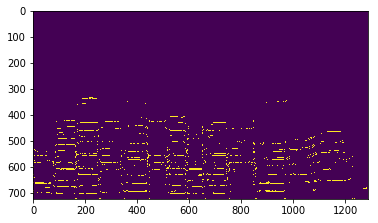

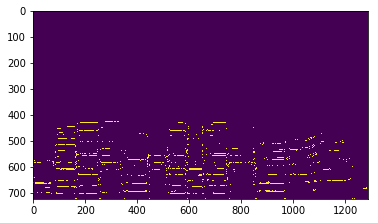

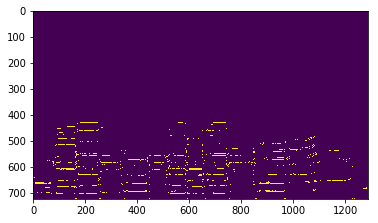

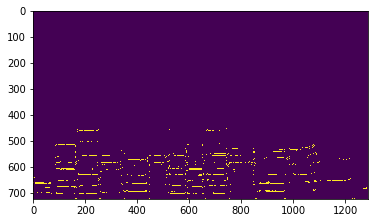

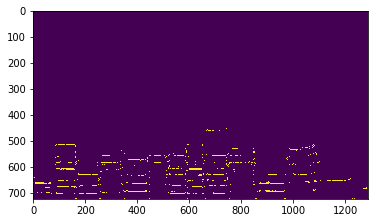

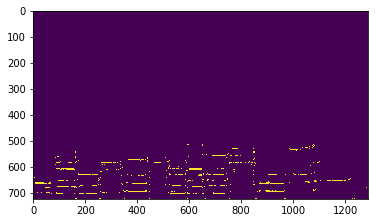

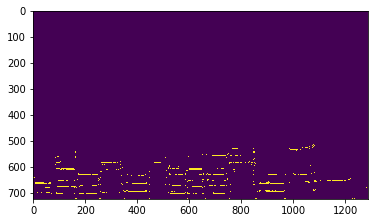

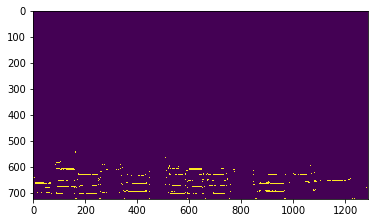

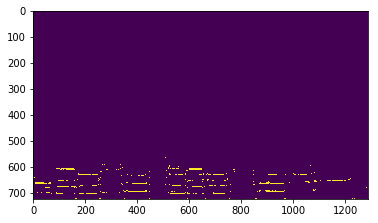

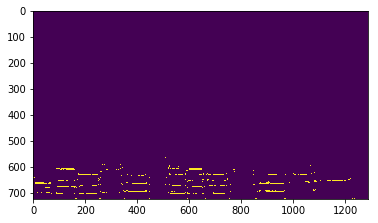

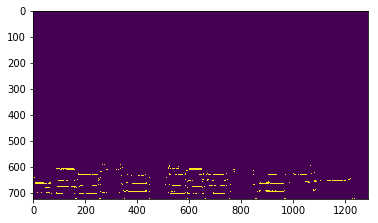

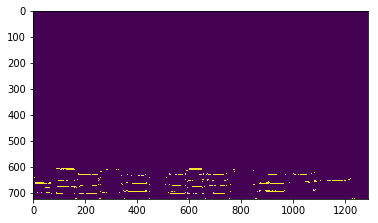

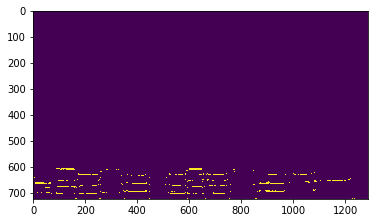

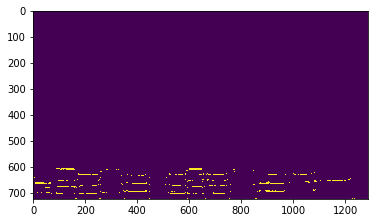

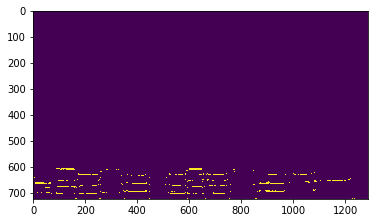

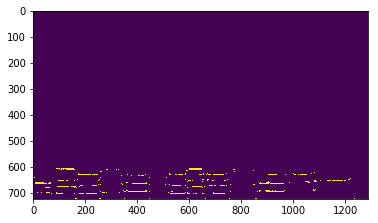

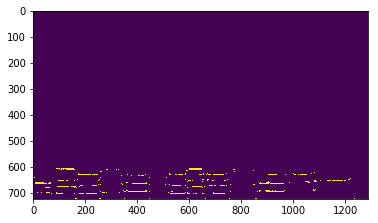

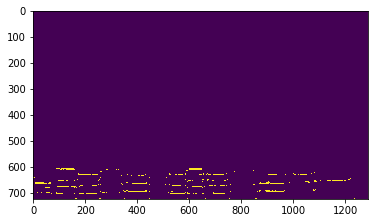

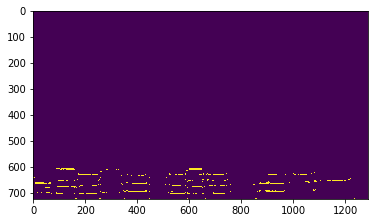

In [29]:
import numpy as np
import cv2

image = cv2.imread("violin.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply Gaussian blur to help reduce noise

image = cv2.GaussianBlur(image, (5, 5), 0)

# If we write a loop, perhaps we can test different values and see if anything looks good!

for x in range(10, 60, 5):
    for y in range(90, 210, 5):
        canny = cv2.Canny(image, x, y)
        plt.imshow(canny)
        plt.show()
